# Selecting data related to COVID-19
In this notebook we will select among the submissions that are related to the coronavirus outbreak and those that are not. We'll start with the 'China' subreddit, whose posts are all labeled according to their topic and, therefore guarantees an easy check on the performances of the selector.

In [1]:
import pandas as pd
from coronavirusRelatedTerms import coronavirus_terms_high_corr, coronavirus_terms_medium_corr, coronavirus_terms_low_corr
from subreddit_list import subreddit_list
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_colwidth = 100

In [2]:
base_path = 'D:\Politecnico\Tesi\Script\Reddit crawling\Dataset\\'
df = pd.read_csv(base_path + 'China' + ".csv", low_memory = False)

The title needs to be simplified to string for the following passages

In [3]:
def simplify_title(title):
    return str(title[0])

df['title'].apply(simplify_title)

0       C
1       D
2       T
3       L
4       W
       ..
9995    C
9996    N
9997    W
9998    D
9999    农
Name: title, Length: 10000, dtype: object

## Selector
The selection principle is easy: after choosing a subset of words related to the coronavirus, we check how many of those are present inside the title of each submission. According to the result, we define whether the post is related or not. Not all of the words have the same weight: some guarantee its relatedness (eg 'coronavirus' or 'covid'), while others have a lighter correlation (eg 'mask' or 'who').

To select these words I made use of Google Trends

In [4]:
MEDIUM_CORR_SUPPORT = 0.3
LOW_CORR_SUPPORT = 0.2
MIN_SUPPORT = 0.5

def coronavirus_related(row):
    words = row['title'].lower().split(" ")
    chance = 0
    for word in words:
        if word in coronavirus_terms_high_corr:
            return True
        if word in coronavirus_terms_medium_corr:
            chance += MEDIUM_CORR_SUPPORT
        if word in coronavirus_terms_low_corr:
            chance += LOW_CORR_SUPPORT
        if chance > MIN_SUPPORT:
            return True
    return False

In [5]:
df['cv_related'] = df.apply(lambda row: coronavirus_related(row), axis=1)
len(df[df['cv_related'] == True])

2826

We can see that 3110 out of the original 10000 are related to the coronavirus according to our computation. Let's go look a little bit more in detail these results.

In [6]:
df_group = df.drop(df.columns.difference(['link_flair_text','cv_related']), 1)
df_group['cv_unrelated'] = (df_group['cv_related'] == False)
df_group = df_group.groupby(by = 'link_flair_text').sum()

In [7]:
df_group

cv_related  cv_unrelated
link_flair_text                                                     
:Hongbao: 精华帖 | Highlighted Post :Hongbao:         0.0           4.0
HK Protests                                        3.0          27.0
Hong Kong Protests                                 4.0          26.0
中国官媒 | China State Sponsored Media                 0.0           1.0
中国官媒 | China State-Sponsored Media                10.0          24.0
中国生活 | Life in China                              34.0         164.0
中国生活 | Living in China                            37.0         167.0
人情味 | Human Interest Story                        72.0         123.0
俄国官媒 | Russia State-Sponsored Media                3.0           1.0
俄国官媒 | Russian State-Sponsored Media               1.0           0.0
冠状病毒 | Coronavirus                               886.0         846.0
历史 | History                                       9.0         113.0
咨询 | Advice                                       20.0         192.0
咨询 | Advice (Serious)                              1.0           4.0
咨询 | Seeking Advice (Serious)                      6.0         151.0
搞笑 | Comedy                                       54.0         295.0
政治 | Politics                                    122.0         453.0
文化 | Culture                                      26.0         353.0
新闻 | General News                                217.0         445.0
旅游 | Travel                                       20.0         145.0
法律 | Law                                           1.0          32.0
法轮功媒体 | FLG Sponsored Media                        3.0           0.0
法轮功媒体 | FLG-Sponsored Media                        5.0           7.0
火 | Viral China/Offbeat                           72.0         140.0
热点新闻 | Breaking News                             165.0         229.0
环境保护 | Environmentalism                            1.0          10.0
科技 | Tech                                         17.0         212.0
经济 | Economy                                      73.0         187.0
美国官媒 | US State Sponsored Media                    1.0           0.0
美国官媒 | US State-Sponsored Media                    9.0          14.0
观点文章 | Opinion Piece                              49.0         158.0
讨论 | Discussion                                  107.0         371.0
讨论 | Discussion (Serious)                         55.0         294.0
语言 | Language                                      2.0          87.0
辩论 | Debate                                       10.0          32.0

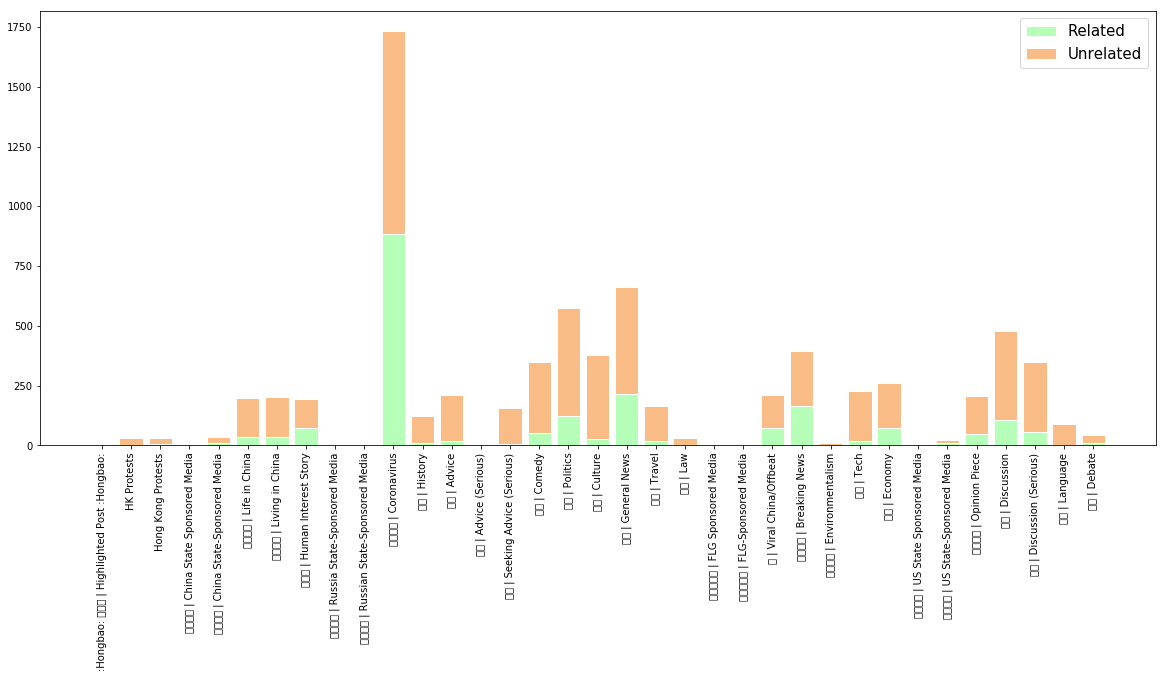

In [9]:
plt.bar(df_group.index, df_group['cv_related'], color='#b5ffb9', edgecolor='white')
plt.bar(df_group.index, df_group['cv_unrelated'], bottom=df_group['cv_related'], color='#f9bc86', edgecolor='white')

plt.legend(['Related', 'Unrelated'], prop = {'size':15})
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

Apparently, not all of the posts in the Coronavirus section are actually related to the Coronavirus, while a lot of other related posts can be found in other categories. Let's try to grab some of them to see what happened, for example from the 'Hong Kong Protests' and 'Tech' subreddits.

In [10]:
df[(df['link_flair_text'] == 'Hong Kong Protests') & (df['cv_related'] == True)]['title']

520        Discussing Hong Kong, Politics, Propaganda, Brainwashing, Media &amp; Coronavirus With Dan Cohen
1055    Why Coronavirus hasn’t stopped Hong Kong’s protest movement: Governments are seizing the opportu...
2371                        Hong Kong police are using Coronavirus restrictions to clamp down on protesters
3083                Support for Hong Kong protesters' demands rises even as coronavirus halts rallies: poll
Name: title, dtype: object

In [11]:
df[(df['link_flair_text'] == '科技 | Tech') & (df['cv_related'] == True)]['title']

295            Covid-19 Quarantine Makes It Easier to Cheat in Exams in China - Online Education - PingWest
788                               Huawei boss warns UK against halting 5G rollout during coronavirus crisis
1354                                            Korean hackers are targeting China over Covid-19 · TechNode
2463    China's Coronavirus health code apps raise concerns over privacy: Apps, which allow people to mo...
2502                 How China unleashed Twitter bots to spread COVID-19 propaganda in Italy - Formiche.net
4878                                              How Baidu is bringing AI to the fight against coronavirus
5112                                 China firm develops system to recognize faces behind coronavirus masks
5740    Peter Zeihan: “The Chinese have steadily built up these tools for citizen surveillance. They're ...
6327                                                        Coronavirus will delay China’s digital currency
7914                        

The titles in the first section were correctly labeled as 'related', the posts in this case were just from two overlapping topics. The second section is more interesting: again most of the posts are coronavirus-related, but some of them were incorrectly labeled, mainly because of the words 'China' and 'Chinese'. These two words are probably causing other false positives, so I'll take care of lowering their weight in the selection. Another thing to keep in mind is to avoid counting more than one time the same word, like in posts nr 1310 and 1313.

Peculiar is instead the post number 5951: it contains the words 'outbreak', 'viral' and 'chinese', but is not talking about coronavirus. Unfortunately a certain number of false positives like this is inevitable.

Let's now focus on the false negatives, by looking at posts labeled as 'coronavirus related' that the selection labeled as unrelated.

In [12]:
df[(df['link_flair_text'] == '冠状病毒 | Coronavirus') & (df['cv_related'] == False)]['title'][0:10]

3      Lv Weisheng, Vice President of Shanghai Institute of Public Relations: China's Contribution Can'...
8                      Eric Weinstein Podcast: Jamie Metzl - The Bio-Hacker will see you now, Ready or Not
17     Distribution of masks, disinfectant among Chinese expats gets wary reception in France | The Jap...
41                   There is no cover up because cover ups are illegal and China doesn't do illegal stuff
42                                              G7 backing for WHO leaves Trump isolated at virtual summit
46                                 Does the CCP even realize that they are hated by the rest of the world?
72                                                                            Racist much ?! Fuck the CCP!
81                                        It is an injustice what they are doing against Chinese and China
100    The Fight For Truth In China: CDT Censorship Digest, March 2020: With Every Disaster Comes a Bat...
101    Latest update from China, seco

## Apply selection to all datasets
After the definition of the selection process, it's time to extend it to all the data previously gathered.

In [18]:
info_lists = []

for subreddit_name in subreddit_list:
    df = pd.read_csv(base_path + subreddit_name + ".csv", low_memory = False)
    df['title'].apply(simplify_title)
    df['cv_related'] = df.apply(lambda row: coronavirus_related(row), axis=1)
    info = {'name': subreddit_name, 'num_related': sum(df['cv_related']), 'num_unrelated': len(df) - sum(df['cv_related'])}
    
    info_lists.append(info)
    
    print(subreddit_name + " info:")
    print("\tThere are " + str(info['num_related']) + " posts related to COVID-19 out of " + str(info['num_related'] + info['num_unrelated']))
    print("\n")

coronavirusDownunder info:
	There are 1510 posts related to COVID-19 out of 5684


coronavirusMemes info:
	There are 1225 posts related to COVID-19 out of 10000


coronavirusUK info:
	There are 2175 posts related to COVID-19 out of 10000


coronavirusFOS info:
	There are 2586 posts related to COVID-19 out of 6324


COVID19 info:
	There are 5143 posts related to COVID-19 out of 10000


Covid2019 info:
	There are 1841 posts related to COVID-19 out of 3198


Moronavirus info:
	There are 343 posts related to COVID-19 out of 1194


China_Flu_Uncensored info:
	There are 542 posts related to COVID-19 out of 1169


China_Flu info:
	There are 5159 posts related to COVID-19 out of 10000


nCoV info:
	There are 3090 posts related to COVID-19 out of 4744


CoronavirusUS info:
	There are 3651 posts related to COVID-19 out of 10000


Coronavirus info:
	There are 5463 posts related to COVID-19 out of 10000


CoronavirusNewYork info:
	There are 1020 posts related to COVID-19 out of 2617


CoronavirusC

In [20]:
df_corr = pd.DataFrame(info_lists)

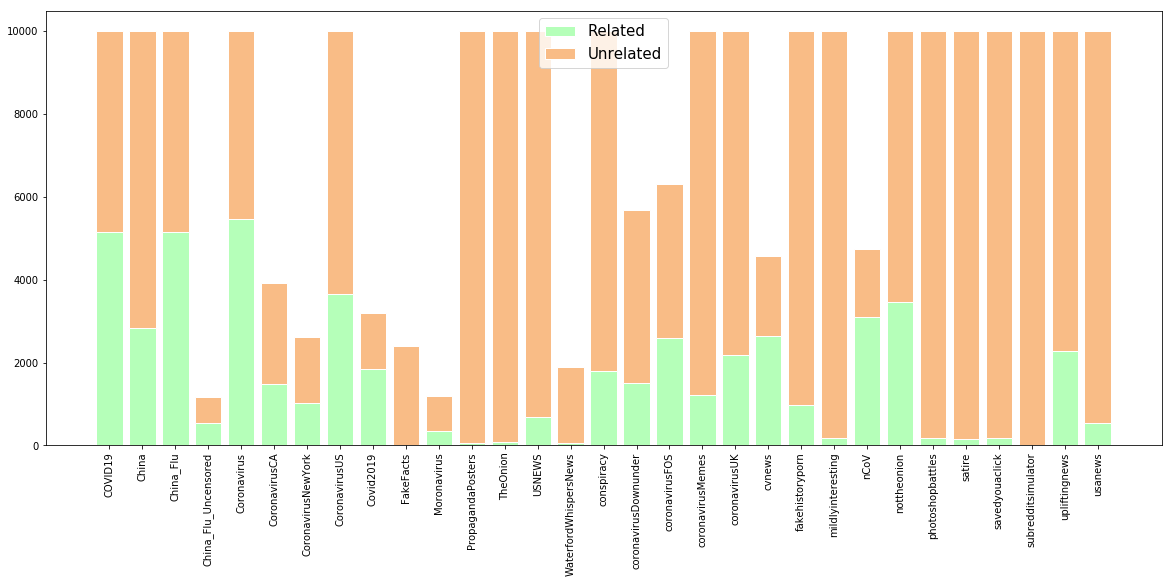

In [21]:
plt.bar(df_corr['name'], df_corr['num_related'], color='#b5ffb9', edgecolor='white')
plt.bar(df_corr['name'], df_corr['num_unrelated'], bottom=df_corr['num_related'], color='#f9bc86', edgecolor='white')

plt.legend(['Related', 'Unrelated'], prop = {'size':15})
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()